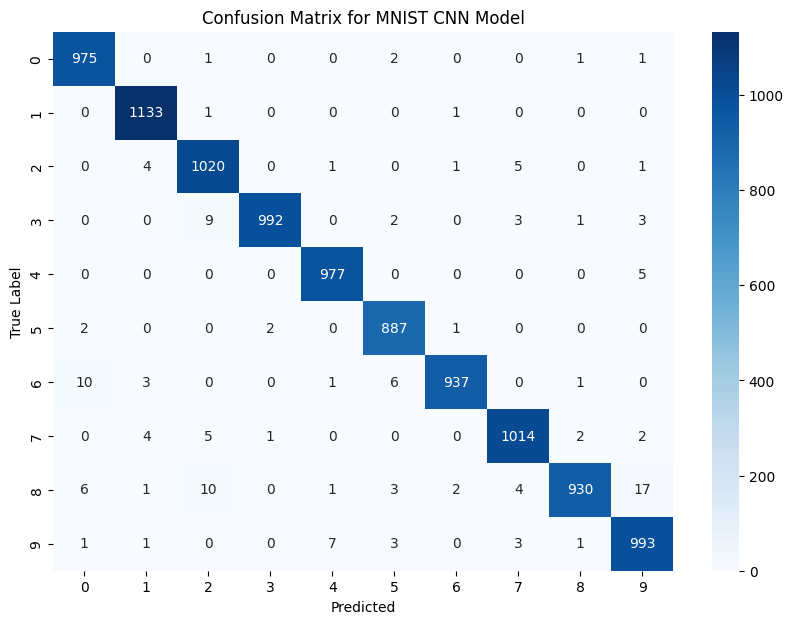

Class 0: TPR=0.9949, FPR=0.0021, TNR=0.9979, FNR=0.0051
Class 0: Accuracy=0.9976, Precision=0.9809, Recall=0.9949, F1-Score=0.9878
Class 1: TPR=0.9982, FPR=0.0015, TNR=0.9985, FNR=0.0018
Class 1: Accuracy=0.9985, Precision=0.9887, Recall=0.9982, F1-Score=0.9934
Class 2: TPR=0.9884, FPR=0.0029, TNR=0.9971, FNR=0.0116
Class 2: Accuracy=0.9962, Precision=0.9751, Recall=0.9884, F1-Score=0.9817
Class 3: TPR=0.9822, FPR=0.0003, TNR=0.9997, FNR=0.0178
Class 3: Accuracy=0.9979, Precision=0.9970, Recall=0.9822, F1-Score=0.9895
Class 4: TPR=0.9949, FPR=0.0011, TNR=0.9989, FNR=0.0051
Class 4: Accuracy=0.9985, Precision=0.9899, Recall=0.9949, F1-Score=0.9924
Class 5: TPR=0.9944, FPR=0.0018, TNR=0.9982, FNR=0.0056
Class 5: Accuracy=0.9979, Precision=0.9823, Recall=0.9944, F1-Score=0.9883
Class 6: TPR=0.9781, FPR=0.0006, TNR=0.9994, FNR=0.0219
Class 6: Accuracy=0.9974, Precision=0.9947, Recall=0.9781, F1-Score=0.9863
Class 7: TPR=0.9864, FPR=0.0017, TNR=0.9983, FNR=0.0136
Class 7: Accuracy=0.9971, P

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# import the mnist_cnn_results csv file with a relative path
df = pd.read_csv('./mnist_cnn_results.csv')

# plot the confusion matrix
cm = confusion_matrix(df['True Label'], df['Predicted Label'])
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST CNN Model')
plt.show()

# Calculate TPR, FPR, TNR, FNR for each class
TPR = {}
FPR = {}
TNR = {}
FNR = {}
for i in range(10):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    TPR[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR[i] = FP / (FP + TN) if (FP + TN) > 0 else 0
    TNR[i] = TN / (TN + FP) if (TN + FP) > 0 else 0
    FNR[i] = FN / (FN + TP) if (FN + TP) > 0 else 0
    print(f'Class {i}: TPR={TPR[i]:.4f}, FPR={FPR[i]:.4f}, TNR={TNR[i]:.4f}, FNR={FNR[i]:.4f}')
    # Print Accuracy, Precision, Recall, F1-Score for each class
    accuracy = (TP + TN) / cm.sum()
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TPR[i]
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f'Class {i}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1_score:.4f}')


# Overall Accuracy, Precision, Recall, F1-Score
overall_accuracy = np.trace(cm) / cm.sum()
overall_precision = np.mean([cm[i, i] / cm[:, i].sum() if cm[:, i].sum() > 0 else 0 for i in range(10)])
overall_recall = np.mean([cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0 for i in range(10)])
overall_f1_score = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall) if (overall_precision + overall_recall) > 0 else 0
print(f'Overall: Accuracy={overall_accuracy:.4f}, Precision={overall_precision:.4f}, Recall={overall_recall:.4f}, F1-Score={overall_f1_score:.4f}')



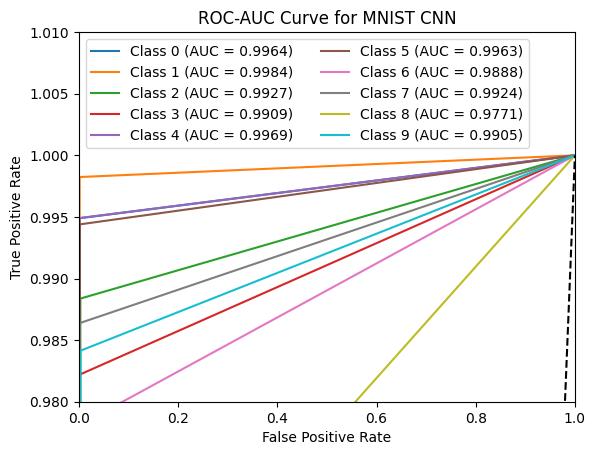

In [2]:
# ROC-AUC plot
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
# Binarize the labels for ROC-AUC computation
n_classes = 10
y_test_binarized = label_binarize(df['True Label'], classes=range(n_classes))
y_score = np.zeros((len(df['Predicted Label']), n_classes))
for i, pred in enumerate(df['Predicted Label']):
    y_score[i, pred] = 1
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([.98, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for MNIST CNN')
plt.legend(loc='upper left', ncol=2)
plt.show()
